In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [2]:
train_directory="./Notes/Train"
val_dir="./Notes/Validation"

In [3]:
HEIGHT=64
WIDTH=64

In [4]:
train = ImageDataGenerator( rotation_range=5,horizontal_flip=False, width_shift_range=0.2, vertical_flip=False,
        height_shift_range=0.1, brightness_range=[0.2,1])
validation=ImageDataGenerator()


In [5]:
train=train.flow_from_directory(train_directory, shuffle=True,
                               target_size=(WIDTH,HEIGHT))
validation=validation.flow_from_directory(val_dir,target_size=(WIDTH,HEIGHT))

Found 83 images belonging to 15 classes.
Found 15 images belonging to 15 classes.


(64, 64, 3)
(32, 15)


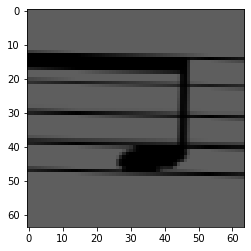

In [6]:
sample=next(iter(train))
plt.imshow(sample[0][0]/255)
print(np.shape(sample[0][0]))
print(np.shape(sample[1]))

In [7]:
#Inspiration from https://www.kaggle.com/taninudomthanakij/beginner-with-vgg16-97-79
def make_model():
    inp = tf.keras.Input(shape=(WIDTH, HEIGHT, 3))
    x = tf.cast(inp, tf.float32)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    resnet= ResNet50(input_shape=(WIDTH,HEIGHT,3), weights='imagenet', include_top=False)
    resnet.trainable = False
    res_mod = resnet(x, training=False)
    res_mod=GlobalAveragePooling2D()(res_mod)
    res_mod=Dropout(0.2)(res_mod)
    res_mod=Dense(256, 'relu')(res_mod)
    res_mod=Dropout(0.2)(res_mod)

    output=Dense(15, "softmax")(res_mod)

    model=tf.keras.Model(inp,output)

    return model

In [8]:
model=make_model()

In [128]:
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
    metrics = ["accuracy"])

In [129]:
stop_alg = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100,
                         restore_best_weights=True, verbose=2)

In [130]:
model.fit(train, epochs = 1000, steps_per_epoch = len(train), batch_size=1,
              validation_data = validation, validation_steps = len(validation), callbacks=[stop_alg])

Epoch 1/1000
3/3 [==============================] - 5s 823ms/step - loss: 6.3138 - accuracy: 0.0602 - val_loss: 3.6842 - val_accuracy: 0.0667
Epoch 2/1000
3/3 [==============================] - 1s 273ms/step - loss: 5.2667 - accuracy: 0.0964 - val_loss: 3.5331 - val_accuracy: 0.1333
Epoch 3/1000
3/3 [==============================] - 1s 308ms/step - loss: 4.9947 - accuracy: 0.0723 - val_loss: 3.4189 - val_accuracy: 0.1333
Epoch 4/1000
3/3 [==============================] - 1s 278ms/step - loss: 4.8869 - accuracy: 0.0482 - val_loss: 3.3169 - val_accuracy: 0.1333
Epoch 5/1000
3/3 [==============================] - 1s 282ms/step - loss: 4.4890 - accuracy: 0.0964 - val_loss: 3.2227 - val_accuracy: 0.0667
Epoch 6/1000
3/3 [==============================] - 1s 312ms/step - loss: 4.2814 - accuracy: 0.0964 - val_loss: 3.1146 - val_accuracy: 0.0667
Epoch 7/1000
3/3 [==============================] - 1s 287ms/step - loss: 4.0445 - accuracy: 0.1205 - val_loss: 3.0066 - val_accuracy: 0.1333
Epoch 

3/3 [==============================] - 1s 260ms/step - loss: 1.4844 - accuracy: 0.4699 - val_loss: 1.9827 - val_accuracy: 0.4667
Epoch 116/1000
3/3 [==============================] - 1s 286ms/step - loss: 1.2527 - accuracy: 0.5783 - val_loss: 1.9834 - val_accuracy: 0.4000
Epoch 117/1000
3/3 [==============================] - 1s 285ms/step - loss: 1.2355 - accuracy: 0.5904 - val_loss: 1.9914 - val_accuracy: 0.4000
Epoch 118/1000
3/3 [==============================] - 1s 280ms/step - loss: 1.2582 - accuracy: 0.5422 - val_loss: 1.9957 - val_accuracy: 0.4000
Epoch 119/1000
3/3 [==============================] - 1s 286ms/step - loss: 1.1429 - accuracy: 0.5904 - val_loss: 1.9999 - val_accuracy: 0.4000
Epoch 120/1000
3/3 [==============================] - 1s 284ms/step - loss: 1.3352 - accuracy: 0.5542 - val_loss: 2.0019 - val_accuracy: 0.4667
Epoch 121/1000
3/3 [==============================] - 1s 279ms/step - loss: 1.2682 - accuracy: 0.5904 - val_loss: 1.9997 - val_accuracy: 0.4667
Epoch 1

Epoch 172/1000
3/3 [==============================] - 1s 314ms/step - loss: 1.0831 - accuracy: 0.6386 - val_loss: 1.8944 - val_accuracy: 0.5333
Epoch 173/1000
3/3 [==============================] - 1s 253ms/step - loss: 0.7215 - accuracy: 0.7711 - val_loss: 1.8965 - val_accuracy: 0.6000
Epoch 174/1000
3/3 [==============================] - 1s 247ms/step - loss: 1.0169 - accuracy: 0.6867 - val_loss: 1.8971 - val_accuracy: 0.5333
Epoch 175/1000
3/3 [==============================] - 1s 257ms/step - loss: 1.0260 - accuracy: 0.6145 - val_loss: 1.8952 - val_accuracy: 0.4667
Epoch 176/1000
3/3 [==============================] - 1s 248ms/step - loss: 1.0182 - accuracy: 0.6627 - val_loss: 1.8911 - val_accuracy: 0.4667
Epoch 177/1000
3/3 [==============================] - 1s 242ms/step - loss: 1.0065 - accuracy: 0.6627 - val_loss: 1.8875 - val_accuracy: 0.4667
Epoch 178/1000
3/3 [==============================] - 1s 250ms/step - loss: 0.9926 - accuracy: 0.6867 - val_loss: 1.8905 - val_accuracy:

Epoch 229/1000
3/3 [==============================] - 1s 248ms/step - loss: 0.8401 - accuracy: 0.7470 - val_loss: 1.9438 - val_accuracy: 0.5333
Epoch 230/1000
3/3 [==============================] - 1s 277ms/step - loss: 0.7492 - accuracy: 0.7590 - val_loss: 1.9367 - val_accuracy: 0.5333
Epoch 231/1000
3/3 [==============================] - 1s 244ms/step - loss: 0.8661 - accuracy: 0.6506 - val_loss: 1.9308 - val_accuracy: 0.5333
Epoch 232/1000
3/3 [==============================] - 1s 282ms/step - loss: 0.9114 - accuracy: 0.6988 - val_loss: 1.9295 - val_accuracy: 0.5333
Epoch 233/1000
3/3 [==============================] - 1s 247ms/step - loss: 0.8550 - accuracy: 0.6988 - val_loss: 1.9291 - val_accuracy: 0.5333
Epoch 234/1000
3/3 [==============================] - 1s 250ms/step - loss: 0.8226 - accuracy: 0.6988 - val_loss: 1.9331 - val_accuracy: 0.5333
Epoch 235/1000
3/3 [==============================] - 1s 245ms/step - loss: 0.6529 - accuracy: 0.8072 - val_loss: 1.9332 - val_accuracy:

In [131]:
stop_alg = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,
                         restore_best_weights=True, verbose=2)

In [132]:
model.layers[4].trainable=True

In [41]:
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-5),
    metrics = ["accuracy"])

In [134]:
#let us train the model (we ran for 1 epoch before what you can see displayed)
history=model.fit(train, epochs =2000, steps_per_epoch = len(train),
              validation_data = validation, validation_steps = len(validation), callbacks=[stop_alg])

Epoch 1/2000
3/3 [==============================] - 12s 2s/step - loss: 0.8778 - accuracy: 0.6867 - val_loss: 1.9117 - val_accuracy: 0.4000
Epoch 2/2000
3/3 [==============================] - 4s 1s/step - loss: 1.0876 - accuracy: 0.6024 - val_loss: 1.8774 - val_accuracy: 0.3333
Epoch 3/2000
3/3 [==============================] - 4s 2s/step - loss: 0.8925 - accuracy: 0.6747 - val_loss: 1.9404 - val_accuracy: 0.3333
Epoch 4/2000
3/3 [==============================] - 4s 1s/step - loss: 0.7281 - accuracy: 0.7711 - val_loss: 2.0298 - val_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 4s 1s/step - loss: 0.7457 - accuracy: 0.6988 - val_loss: 2.0179 - val_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 4s 1s/step - loss: 0.7369 - accuracy: 0.7349 - val_loss: 1.9151 - val_accuracy: 0.4667
Epoch 7/2000
3/3 [==============================] - 4s 1s/step - loss: 0.6795 - accuracy: 0.7952 - val_loss: 1.9110 - val_accuracy: 0.4667
Epoch 8/2000
3/3 [========

In [138]:
#model.save_weights("./checkpoints/62")

In [9]:
model.load_weights("./checkpoints/62")

In [10]:
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-5),
    metrics = ["accuracy"])

In [15]:
test_dir="./Notes/test"

In [14]:
test=ImageDataGenerator()
test=test.flow_from_directory(test_dir,target_size=(WIDTH,HEIGHT))

Found 16 images belonging to 15 classes.


In [16]:
model.evaluate(test)

1/1 [==============================] - 2s 2s/step - loss: 1.6437 - accuracy: 0.6250


[1.643721580505371, 0.625]

In [39]:
train.class_indices

{'A4': 0,
 'A5': 1,
 'B4': 2,
 'B5': 3,
 'C4': 4,
 'C5': 5,
 'C6': 6,
 'D4': 7,
 'D5': 8,
 'E4': 9,
 'E5': 10,
 'F4': 11,
 'F5': 12,
 'G4': 13,
 'G5': 14}

In [41]:
index2key=dict()
for i,j in enumerate(train.class_indices):
    index2key[i]=j
    

In [55]:
ascii_art={4:"e|-----|\nB|-----|\nG|-----|\nD|-----|\nA|--3--|\nE|-----|",
           7:"e|-----|\nB|-----|\nG|-----|\nD|--0--|\nA|-----|\nE|-----|",
           9:"e|-----|\nB|-----|\nG|-----|\nD|--2--|\nA|-----|\nE|-----|",
           11:"e|-----|\nB|-----|\nG|-----|\nD|--3--|\nA|-----|\nE|-----|",
           13:"e|-----|\nB|-----|\nG|--0--|\nD|-----|\nA|-----|\nE|-----|",
           0:"e|-----|\nB|-----|\nG|--2--|\nD|-----|\nA|-----|\nE|-----|",
           2:"e|-----|\nB|--0--|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           5:"e|-----|\nB|--1--|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           8:"e|-----|\nB|--3--|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           10:"e|--0--|\nB|-----|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           12:"e|--1--|\nB|-----|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           14:"e|--3--|\nB|-----|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           1:"e|--5--|\nB|-----|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           3:"e|--7--|\nB|-----|\nG|-----|\nD|-----|\nA|-----|\nE|-----|",
           6:"e|--9--|\nB|-----|\nG|-----|\nD|-----|\nA|-----|\nE|-----|"}


## Demo

In [63]:
test_dir="./Notes/Demo"
test=ImageDataGenerator()
test=test.flow_from_directory(test_dir,target_size=(WIDTH,HEIGHT))

Found 1 images belonging to 1 classes.


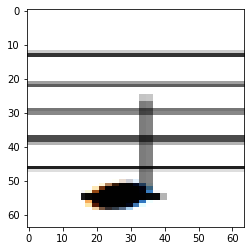

e|-----|
B|-----|
G|-----|
D|-----|
A|--3--|
E|-----| C4


In [65]:
counter=0
for i in test:
    plt.imshow(i[0][0]/255)
    counter+=1
    plt.show()
    result = model.predict(i[0])
    index=result.argmax(axis=1)[0]
    print(ascii_art[index], index2key[index])
    if counter==1:
        break

Found 1 images belonging to 1 classes.


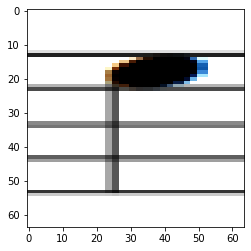

e|--0--|
B|-----|
G|-----|
D|-----|
A|-----|
E|-----| E5


In [67]:
test_dir="./Notes/Demo2"
test=ImageDataGenerator()
test=test.flow_from_directory(test_dir,target_size=(WIDTH,HEIGHT))
counter=0
for i in test:
    plt.imshow(i[0][0]/255)
    counter+=1
    plt.show()
    result = model.predict(i[0])
    index=result.argmax(axis=1)[0]
    print(ascii_art[index], index2key[index])
    if counter==1:
        break